# **Exercise 1: Apache Spark Basics**

In [ ]:
import pandas as pd
import numpy as np
from pyspark import SparkContext, SQLContext, SparkConf
import pyspark.sql.functions as func
from functools import reduce
from pyspark.sql.functions import mean, stddev,col,collect_set
from pyspark.sql.functions import to_date, date_format,udf
import pyspark.sql.types as sparktypes
from pyspark.sql.types import DateType
from datetime import datetime , date
from matplotlib import pyplot as plt
%matplotlib inline
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import col, collect_list

In [ ]:
conf = SparkConf().setAppName("appdda")
sc= SparkContext(conf=conf)

#Part A: Basic Operations on Resilient Distributed Dataset (RDD)

1.   Create two RDD objects of a, b
2.   Perform rightOuterJoin and fullOuterJoin operations between a and b
3.   How many times "s" character appears?
  *   Using map and reduce funtion
  *   Using aggregate function

## *Create two RDD objects of a, b*

In [ ]:
a = ["spark", "rdd", "python", "context", "create", "class"]
b = ["operation", "apache", "scala", "lambda","parallel","partition"]

In [ ]:
a = sc.parallelize(a)
b = sc.parallelize(b)

In [ ]:
print("a:", a.collect())
print("b:", b.collect())

a: ['spark', 'rdd', 'python', 'context', 'create', 'class']
b: ['operation', 'apache', 'scala', 'lambda', 'parallel', 'partition']


## *Perform rightOuterJoin and fullOuterJoin operations between a and b*

In [ ]:
r1 = a.rightOuterJoin(b).collect()       #Right outer join
print(r1)

[('s', ('p', 'c')), ('o', (None, 'p')), ('l', (None, 'a')), ('a', (None, 'p')), ('p', ('y', 'a')), ('p', ('y', 'a'))]


In [ ]:
f1 = a.fullOuterJoin(b).collect()        #Full outer join
print(f1)

[('s', ('p', 'c')), ('c', ('o', None)), ('c', ('r', None)), ('c', ('l', None)), ('o', (None, 'p')), ('r', ('d', None)), ('l', (None, 'a')), ('a', (None, 'p')), ('p', ('y', 'a')), ('p', ('y', 'a'))]


## *How many times "s" character appears? Using map and reduce functions*

In [ ]:
c = a.union(b).flatMap(lambda x: x).filter(lambda x: x == "s").map(lambda x: (x,1)).reduceByKey(lambda x,y: x+y).collect()
print("s frequency:", c)

s frequency: [('s', 4)]


## *How many times "s" character appears? Using aggregate function*

In [ ]:
d = a.union(b).flatMap(lambda x: x).filter(lambda x: x == "s").aggregate(0,(lambda x, value: x + 1),(lambda x, y: x + y))
print("s frequency=", d)

s frequency= 4


#Part B: Basic Operations on DataFrames
Dataset students.json


1.   Replace the null values in column points by the mean of all points
2.   Replace the null values in column dob and column last name by "unknown" and "--" respectively
3.   Convert all the dates into DD-MM-YYYY format
4.   Create new age column and calculate age of students
5.   Update point of student to maximum (20) points, if point of student is larger than 1 standard deviation of all points
6.   Create histogram updated points of students

In [ ]:
SQLContext = SQLContext(sc)

In [ ]:
students = sc.textFile("C:/Users/user/students.json")
sdf = SQLContext.read.json(students)
sdf.show()

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|     null|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

In [ ]:
#sdf.describe().show()

In [ ]:
#sdf.count()

## *Replace the null values in column points by the mean of all points*

In [ ]:
mean_p=sdf.agg(func.mean('points')).show()
mean_p

+------------------+
|       avg(points)|
+------------------+
|11.736842105263158|
+------------------+



In [ ]:
mean_p=11.736842105263158

In [ ]:
sdf_replaced1=sdf.fillna({"points":np.round(mean_p)})
sdf_replaced1.show()

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|     null|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

## *Replace the null values in column dob and column last name by "unknown" and "--" respeCtively*

In [ ]:
sdf_replaced2=sdf_replaced1.fillna({ "dob":'unknown', "last_name":'--' })
sdf_replaced2.show()

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|       --|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

In [ ]:
sdf_replaced2.describe().show()

+-------+----------+--------------+----------+---------+-----------------+-----------------+
|summary|    course|           dob|first_name|last_name|           points|             s_id|
+-------+----------+--------------+----------+---------+-----------------+-----------------+
|  count|        20|            20|        20|       20|               20|               20|
|   mean|      null|          null|      null|     null|            11.75|             10.5|
| stddev|      null|          null|      null|     null|3.242400020777332|5.916079783099616|
|    min|  Business|1 January 1984|      Alan|       --|                6|                1|
|    max|Psychology|       unknown|   Zachary|    Weber|               19|               20|
+-------+----------+--------------+----------+---------+-----------------+-----------------+



## *Convert all the dates into DD-MM-YYYY format*

In [ ]:
def convert_date(dob):
    if(len(dob.split(" "))>1):
        if(dob.split(" ")[0].isdigit()):
            dob_update = datetime.strptime(dob,'%d %B %Y').date().strftime('%d-%m-%Y')
            return dob_update
        else:
            dob_update = datetime.strptime(dob,'%B %d, %Y').date().strftime('%d-%m-%Y')
            return dob_update
    else:
        return "unknown"

In [ ]:
convert_date_udf = udf(convert_date, sparktypes.StringType())
sdf_replaced3 = sdf_replaced2.withColumn("dob",convert_date_udf(sdf_replaced2["dob"]))
sdf_replaced3.show()

+------------------+----------+----------+---------+------+----+
|            course|       dob|first_name|last_name|points|s_id|
+------------------+----------+----------+---------+------+----+
|Humanities and Art|14-10-1983|      Alan|      Joe|    10|   1|
|  Computer Science|26-09-1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|12-06-1982|     Athur|   Watson|    16|   3|
|    Graphic Design|05-04-1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|01-11-1978|      Kira| Schommer|    11|   5|
|          Business|17-02-1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|01-01-1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|13-01-1978|      John|       --|    10|   8|
|  Machine Learning|26-12-1989|    Marcus|   Carson|    15|   9|
|           Physics|30-12-1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|12-06-1975|     Holly| Schwartz|    12|  11|
|  Computer Science|02-07-1985|     April|    Black|    12|  12|
|  Computer Science|22-07

## *Create new age column and calculate age of students*

In [ ]:
def calc_age(dob):
    if len(dob.split("-"))>1:
        current_day = date.today()
        dob = datetime.strptime(dob, "%d-%m-%Y")
        age = current_day.year - dob.year
        return age
    else:
        return "..."

In [ ]:
calc_age_udf = udf(calc_age, sparktypes.StringType())
sdf_age = sdf_replaced3.withColumn("age",calc_age_udf(sdf_replaced3["dob"]))
sdf_age.show()

+------------------+----------+----------+---------+------+----+---+
|            course|       dob|first_name|last_name|points|s_id|age|
+------------------+----------+----------+---------+------+----+---+
|Humanities and Art|14-10-1983|      Alan|      Joe|    10|   1| 37|
|  Computer Science|26-09-1980|    Martin|  Genberg|    17|   2| 40|
|    Graphic Design|12-06-1982|     Athur|   Watson|    16|   3| 38|
|    Graphic Design|05-04-1987|  Anabelle|  Sanberg|    12|   4| 33|
|        Psychology|01-11-1978|      Kira| Schommer|    11|   5| 42|
|          Business|17-02-1981| Christian|   Kiriam|    10|   6| 39|
|  Machine Learning|01-01-1984|   Barbara|  Ballard|    14|   7| 36|
|     Deep Learning|13-01-1978|      John|       --|    10|   8| 42|
|  Machine Learning|26-12-1989|    Marcus|   Carson|    15|   9| 31|
|           Physics|30-12-1987|     Marta|   Brooks|    11|  10| 33|
|    Data Analytics|12-06-1975|     Holly| Schwartz|    12|  11| 45|
|  Computer Science|02-07-1985|   

## *Update point of student to maximum (20) points, if point of student is larger than 1 standard deviation of all points*

In [ ]:
def grant_points(p):
    if p > (points_mean + points_std):
        return int(20)
    else:
        return p

In [ ]:
#sdf_age.select(mean(sdf_age["points"])).collect()

[Row(avg(points)=11.75)]

In [ ]:
points_mean = sdf_age.select(mean(sdf_age["points"])).collect()[0][0]        #in the list ==> get it from the list
print("Mean of points of students:",round(points_mean,2))

points_std = sdf_age.select(stddev(sdf_age["points"])).collect()[0][0]
print("Standard deviation of points of students:",round(points_std,2))

Mean of points of students: 11.75
Standard deviation of points of students: 3.24


In [ ]:
grantpoints_udf = udf(grant_points, sparktypes.StringType())
sdf_newpoints = sdf_age.withColumn("points_updated",grantpoints_udf(sdf_age["points"]))

sdf_newpoints.show()

+------------------+----------+----------+---------+------+----+---+--------------+
|            course|       dob|first_name|last_name|points|s_id|age|points_updated|
+------------------+----------+----------+---------+------+----+---+--------------+
|Humanities and Art|14-10-1983|      Alan|      Joe|    10|   1| 37|            10|
|  Computer Science|26-09-1980|    Martin|  Genberg|    17|   2| 40|            20|
|    Graphic Design|12-06-1982|     Athur|   Watson|    16|   3| 38|            20|
|    Graphic Design|05-04-1987|  Anabelle|  Sanberg|    12|   4| 33|            12|
|        Psychology|01-11-1978|      Kira| Schommer|    11|   5| 42|            11|
|          Business|17-02-1981| Christian|   Kiriam|    10|   6| 39|            10|
|  Machine Learning|01-01-1984|   Barbara|  Ballard|    14|   7| 36|            14|
|     Deep Learning|13-01-1978|      John|       --|    10|   8| 42|            10|
|  Machine Learning|26-12-1989|    Marcus|   Carson|    15|   9| 31|        

## *Create histogram updated points of students*

In [ ]:
df = sdf_newpoints.select("s_id" , "points_updated").toPandas()
df["points_updated"] = pd.to_numeric(df["points_updated"])

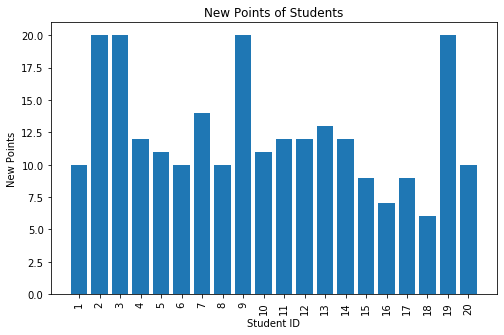

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.bar(df.s_id,df["points_updated"])
plt.xticks(df.s_id,rotation=90)
plt.title("New Points of Students")
plt.xlabel("Student ID")
plt.ylabel("New Points")
plt.show()

# **Exercise 2: Manipulating Recommender Dataset with Apache Spark**


1.   Separate out tagging sessions for each user (termination of session: inactive duration of 30 minuntes)
2.   Calculate the frequency of tagging for each user session
3.   Find a mean and standard deviation of the tagging frequency of each user
4.   Find a mean and standard deviation of the tagging frequency for across users
5.   Provide the list of users with a mean tagging frequency within the two standard deviation from the mean frequency of all users

In [ ]:
conf = SparkConf().setAppName("appdda")
sc= SparkContext(conf=conf)

In [ ]:
sqlContext = SQLContext(sc)

In [ ]:
df = pd.read_csv('C:/Users/user/ml-10M100K/tags.dat',delimiter="::",names=['UserID', 'MovieID', 'Tag', 'Timestamp']).astype(str)
tdf = sqlContext.createDataFrame(df)
tdf.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


+------+-------+--------------------+----------+
|UserID|MovieID|                 Tag| Timestamp|
+------+-------+--------------------+----------+
|    15|   4973|          excellent!|1215184630|
|    20|   1747|            politics|1188263867|
|    20|   1747|              satire|1188263867|
|    20|   2424|     chick flick 212|1188263835|
|    20|   2424|               hanks|1188263835|
|    20|   2424|                ryan|1188263835|
|    20|   2947|              action|1188263755|
|    20|   2947|                bond|1188263756|
|    20|   3033|               spoof|1188263880|
|    20|   3033|           star wars|1188263880|
|    20|   7438|              bloody|1188263801|
|    20|   7438|             kung fu|1188263801|
|    20|   7438|           Tarantino|1188263801|
|    21|  55247|                   R|1205081506|
|    21|  55253|               NC-17|1205081488|
|    25|     50|        Kevin Spacey|1166101426|
|    25|   6709|         Johnny Depp|1162147221|
|    31|     65|    

In [ ]:
tdf = tdf.withColumn("UserID", tdf["UserID"].cast(IntegerType()))         #UserID converted to integer
tdf = tdf.withColumn('date_time', func.from_unixtime('timestamp'))        #Timestamp converted to datetime
#tdf.show()

## *Separate out tagging sessions for each user (termination of session: inactive duration of 30 minuntes)*

In [ ]:
tagged = tdf.groupBy(['UserID']).agg(collect_list("date_time").alias('group_tags')).sort(asc("UserID"))
tagged.show()

+------+--------------------+
|UserID|          group_tags|
+------+--------------------+
|    15|[2008-07-04 18:17...|
|    20|[2007-08-28 04:17...|
|    21|[2008-03-09 18:51...|
|    25|[2006-12-14 15:03...|
|    31|[2007-08-28 04:15...|
|    32|[2006-11-28 19:35...|
|    39|[2007-08-28 04:16...|
|    48|[2008-07-04 04:40...|
|    49|[2007-08-28 04:24...|
|    75|[2006-10-30 00:20...|
|    78|[2007-04-16 05:43...|
|   109|[2008-05-22 08:13...|
|   127|[2007-08-28 04:42...|
|   133|[2007-08-28 04:43...|
|   146|[2008-11-15 11:52...|
|   147|[2006-10-30 08:11...|
|   170|[2006-10-30 13:52...|
|   175|[2007-08-30 05:37...|
|   181|[2007-08-28 04:55...|
|   190|[2006-06-30 23:41...|
+------+--------------------+
only showing top 20 rows



In [ ]:
tagged_df=tagged.select("UserID", "group_tags").toPandas()

## *Calculate the frequency of tagging for each user session*

In [ ]:
freq_sessions = []
def calc_session(tag_dates):                       #calculate sessions for each user
    for k in tag_dates:
        k = pd.to_datetime(k)        
        sessions = []
#        count = 1
        frequency =  1        
        for i in range(len(k) -1):            
            if (k[i+1] - k[i]) >pd.Timedelta("30 min"):
#                count = count + 1
                sessions.append(frequency)
#                frequency =  0                
            frequency = frequency + 1                
        sessions.append(frequency)        
        freq_sessions.append(sessions)                
    return freq_sessions

In [ ]:
freq_sessions = calc_session(tagged_df['group_tags'])          
tagged_df["sessions"] = freq_sessions

tag_session= sqlContext.createDataFrame(tagged_df)
tag_session.show()                                      #tagging sessions for each user

+------+--------------------+--------------------+
|UserID|          group_tags|            sessions|
+------+--------------------+--------------------+
|    15|[2008-07-04 18:17...|                 [1]|
|    20|[2007-08-28 04:17...|                [12]|
|    21|[2008-03-09 18:51...|                 [2]|
|    25|[2006-12-14 15:03...|                 [2]|
|    31|[2007-08-28 04:15...|                 [5]|
|    32|[2006-11-28 19:35...|                 [1]|
|    39|[2007-08-28 04:16...|                 [5]|
|    48|[2008-07-04 04:40...|                 [2]|
|    49|[2007-08-28 04:24...|                [15]|
|    75|[2006-10-30 00:20...|                 [1]|
|    78|[2007-04-16 05:43...|                 [1]|
|   109|[2008-05-22 08:13...|[3, 5, 11, 13, 18...|
|   127|[2007-08-28 04:42...|                [26]|
|   133|[2007-08-28 04:43...|                 [5]|
|   146|[2008-11-15 11:52...|[2, 5, 8, 9, 12, ...|
|   147|[2006-10-30 08:11...|                 [2]|
|   170|[2006-10-30 13:52...|  

In [ ]:
frequency = tdf.groupBy('UserID').count().sort("UserID", ascending=True)       #Frequency of UserID
frequency.show()

+------+-----+
|UserID|count|
+------+-----+
|    15|    1|
|    20|   12|
|    21|    2|
|    25|    2|
|    31|    5|
|    32|    1|
|    39|    5|
|    48|    2|
|    49|   15|
|    75|    1|
|    78|    1|
|   109|   25|
|   127|   26|
|   133|    5|
|   146| 1648|
|   147|    2|
|   170|    1|
|   175|    2|
|   181|    4|
|   190|   26|
+------+-----+
only showing top 20 rows



In [ ]:
tagging_freq= tag_session.join(frequency,"UserID").withColumnRenamed("count","Frequency").sort("UserID", ascending=True)
tagging_freq.show()         #Tagging and frequency for each user

## *Find a mean and standard deviation of the tagging frequency of each user*

In [ ]:
session_mean = udf(lambda sessions: np.mean(sessions).tolist(),FloatType())
session_std = udf(lambda sessions: np.std(sessions).tolist(),FloatType())

In [ ]:
tag_mstd= tagging_freq.withColumn('mean', session_mean('sessions')).withColumn('stddev', session_std('sessions'))
tag_mstd.show()

+------+--------------------+--------------------+---------+---------+---------+
|UserID|          group_tags|            sessions|Frequency|     mean|   stddev|
+------+--------------------+--------------------+---------+---------+---------+
|    15|[2008-07-04 18:17...|                 [1]|        1|      1.0|      0.0|
|    20|[2007-08-28 04:17...|                [12]|       12|     12.0|      0.0|
|    21|[2008-03-09 18:51...|                 [2]|        2|      2.0|      0.0|
|    25|[2006-12-14 15:03...|                 [2]|        2|      2.0|      0.0|
|    31|[2007-08-28 04:15...|                 [5]|        5|      5.0|      0.0|
|    32|[2006-11-28 19:35...|                 [1]|        1|      1.0|      0.0|
|    39|[2007-08-28 04:16...|                 [5]|        5|      5.0|      0.0|
|    48|[2008-07-04 04:40...|                 [2]|        2|      2.0|      0.0|
|    49|[2007-08-28 04:24...|                [15]|       15|     15.0|      0.0|
|    75|[2006-10-30 00:20...

## *Find a mean and standard deviation of the tagging frequency for across users*

In [ ]:
across_users = tag_mstd.select(mean(col('Frequency')).alias('mean'),stddev(col('Frequency')).alias('std')).collect()
print(across_users[0])

Row(mean=23.841356946869542, std=179.68054035590325)


## *Provide the list of users with a mean tagging frequency within the two standard deviation from the mean frequency of all users*

In [ ]:
mean_all = across_users[0]['mean']
std_all = across_users[0]['std']
minimum = mean_all-(2*std_all)
maximum = mean_all+(2*std_all)
print("min=", minimum, "max=", maximum)

tag_mstd.filter(col("mean").between(minimum,maximum)).show()

min= -335.51972376493694 max= 383.20243765867605
+------+--------------------+--------------------+---------+---------+---------+
|UserID|          group_tags|            sessions|Frequency|     mean|   stddev|
+------+--------------------+--------------------+---------+---------+---------+
|    15|[2008-07-04 18:17...|                 [1]|        1|      1.0|      0.0|
|    20|[2007-08-28 04:17...|                [12]|       12|     12.0|      0.0|
|    21|[2008-03-09 18:51...|                 [2]|        2|      2.0|      0.0|
|    25|[2006-12-14 15:03...|                 [2]|        2|      2.0|      0.0|
|    31|[2007-08-28 04:15...|                 [5]|        5|      5.0|      0.0|
|    32|[2006-11-28 19:35...|                 [1]|        1|      1.0|      0.0|
|    39|[2007-08-28 04:16...|                 [5]|        5|      5.0|      0.0|
|    48|[2008-07-04 04:40...|                 [2]|        2|      2.0|      0.0|
|    49|[2007-08-28 04:24...|                [15]|       15|